<a href="https://colab.research.google.com/github/diegop2110/Talento_Tech/blob/main/Programaci%C3%B3n_de_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

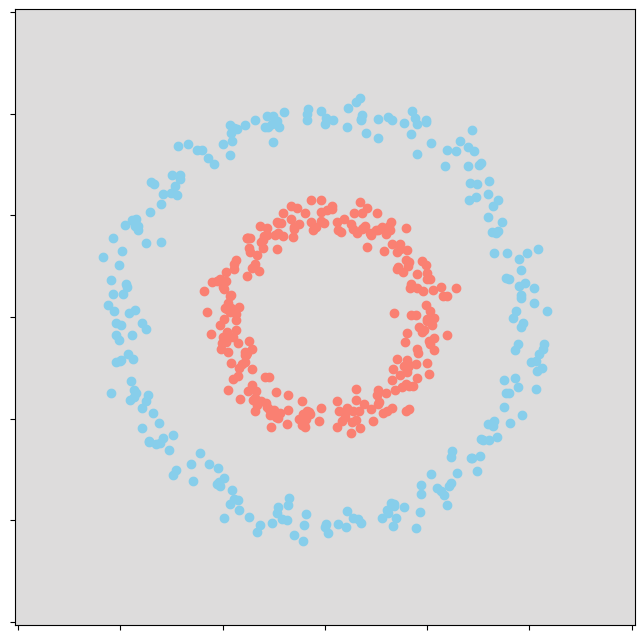

In [18]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
# Creamos nuestros datos artificiales, donde buscaremos clasificar
# dos anillos concentricos de datos.
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)


# Resolucion del mapa de predicción.
res = 100

# Coordenadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de prediccion.

_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)



step 0 / 1000 - Loss - 0.24181461 - Acc -  0.64
step 25 / 1000 - Loss - 0.1406495 - Acc -  0.76
step 50 / 1000 - Loss - 0.10044393 - Acc -  0.9
step 75 / 1000 - Loss - 0.07826329 - Acc -  0.95
step 100 / 1000 - Loss - 0.065518275 - Acc -  0.97
step 125 / 1000 - Loss - 0.057300642 - Acc -  0.99
step 150 / 1000 - Loss - 0.051435664 - Acc -  0.99
step 175 / 1000 - Loss - 0.04691823 - Acc -  0.99
step 200 / 1000 - Loss - 0.043311395 - Acc -  0.99
step 225 / 1000 - Loss - 0.040344696 - Acc -  0.99
step 250 / 1000 - Loss - 0.03785304 - Acc -  0.99
step 275 / 1000 - Loss - 0.035727978 - Acc -  0.99
step 300 / 1000 - Loss - 0.03388421 - Acc -  0.99
step 325 / 1000 - Loss - 0.03226998 - Acc -  0.99
step 350 / 1000 - Loss - 0.030843183 - Acc -  0.99
step 375 / 1000 - Loss - 0.029571854 - Acc -  0.99
step 400 / 1000 - Loss - 0.028429892 - Acc -  0.99
step 425 / 1000 - Loss - 0.0273974 - Acc -  0.99
step 450 / 1000 - Loss - 0.026458632 - Acc -  0.99
step 475 / 1000 - Loss - 0.025599875 - Acc -  0.

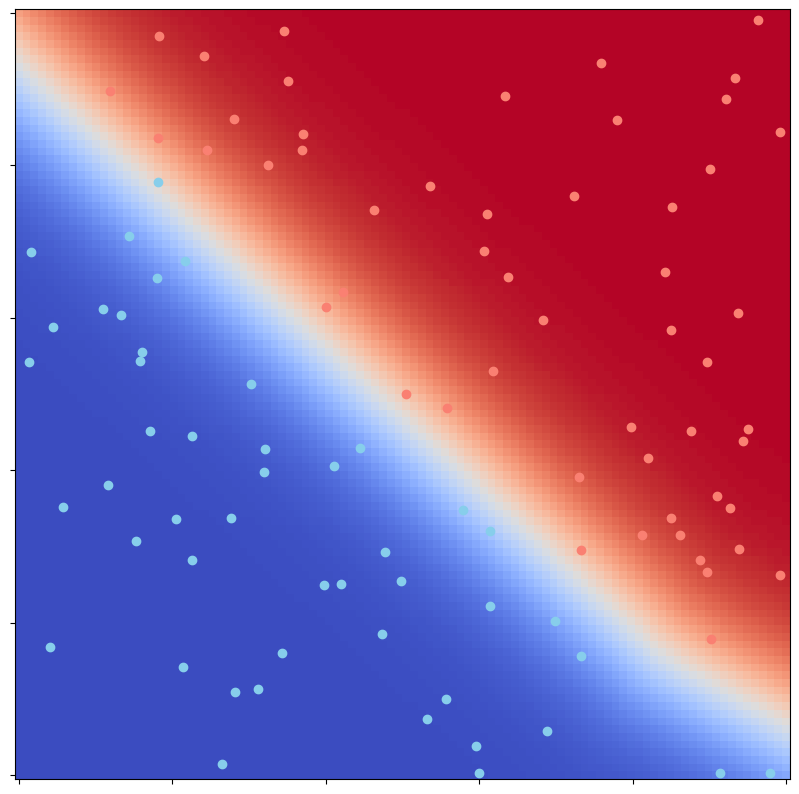

In [25]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.core.display import display, HTML

# Definimos los datos de entrada (X, Y)
# Estas deben estar definidas en tu entorno. Aquí hay un ejemplo de definición:
X = np.random.rand(100, 2)
Y = (np.sum(X, axis=1) > 1).astype(np.float32)

# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01          # learning rate
nn = [2, 16, 8, 1] # Número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:,0]

# Evaluación de predicciones
loss = tf.losses.mean_squared_error(iY, pY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
n_steps = 1000 # Número de ciclos de entrenamiento.
iPY = [] # Aquí guardaremos la evolución de las predicciones, para la animación.

# Definimos el espacio para las predicciones
res = 100
_x0, _x1 = np.meshgrid(np.linspace(0, 1, res), np.linspace(0, 1, res))
_px = np.c_[_x0.ravel(), _x1.ravel()]

with tf.Session() as sess:
    # Inicializamos todos los parámetros de la red, las matrices W y b
    sess.run(tf.global_variables_initializer())
    # Iteramos n pasos de entrenamiento
    for step in range(n_steps):
        # Evaluamos al optimizador, la función de coste y al tensor de salida pY.
        # La evaluación del optimizer producirá el entrenamiento de la red.
        _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={iX: X, iY: Y})
        # Cada 25 iteraciones, imprimimos métricas.
        if step % 25 == 0:
            # Cálculo del accuracy.
            acc = np.mean(np.round(_pY) == Y)
            # Impresión de métricas.
            print('step', step, '/', n_steps, '- Loss -', _loss, '- Acc - ', acc)
            # Obtenemos predicciones para cada punto de nuestro mapa de predicción _px.
            _predictions = sess.run(pY, feed_dict={iX: _px}).reshape(res, res)
            # Y lo guardamos para visualizar la animación.
            iPY.append(_predictions)

# ----- CÓDIGO ANIMACIÓN ----- #
ins = []
fig = plt.figure(figsize=(10, 10))
print('--- Generando animación ---')

for fr in range(len(iPY)):
    im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap='coolwarm', animated=True)
    # Visualización de la nube de datos.
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c='skyblue')
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='salmon')
    # plt.title("Resultado Clasificación")
    plt.tick_params(labelbottom=False, labelleft=False)
    ins.append([im])

ani = animation.ArtistAnimation(fig, ins, interval=50, blit=True, repeat_delay=1000)
display(HTML(ani.to_html5_video()))


In [29]:
import tensorflow as tf
import tensorflow.keras as kr

# Definimos los datos de entrada (X, Y)
# Ejemplo de definición:
import numpy as np
X = np.random.rand(100, 2)
Y = (np.sum(X, axis=1) > 1).astype(np.float32)

lr = 0.01          # learning rate
nn = [2, 16, 8, 1] # Número de neuronas por capa

# Creamos el objeto que contendrá a nuestra red neuronal como secuencia de capas.
model = kr.Sequential()

# Añadimos las capas
model.add(kr.layers.Dense(nn[1], activation='relu', input_shape=(nn[0],)))
model.add(kr.layers.Dense(nn[2], activation='relu'))
model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo
model.compile(loss='mse', optimizer=kr.optimizers.legacy.SGD(lr=0.05), metrics=['acc'])

# Y entrenamos el modelo
model.fit(X, Y, epochs=100)


Train on 100 samples
Epoch 1/100
100/100 [==============================] - 0s 4ms/sample - loss: 0.2459 - acc: 0.5600
Epoch 2/100
100/100 [==============================] - 0s 479us/sample - loss: 0.2444 - acc: 0.7000
Epoch 3/100
100/100 [==============================] - 0s 390us/sample - loss: 0.2427 - acc: 0.6000
Epoch 4/100
100/100 [==============================] - 0s 378us/sample - loss: 0.2412 - acc: 0.6900
Epoch 5/100
100/100 [==============================] - 0s 533us/sample - loss: 0.2392 - acc: 0.6600
Epoch 6/100
100/100 [==============================] - 0s 193us/sample - loss: 0.2379 - acc: 0.7200
Epoch 7/100
100/100 [==============================] - 0s 355us/sample - loss: 0.2360 - acc: 0.7300
Epoch 8/100
100/100 [==============================] - 0s 484us/sample - loss: 0.2342 - acc: 0.7100
Epoch 9/100
100/100 [==============================] - 0s 500us/sample - loss: 0.2326 - acc: 0.6200
Epoch 10/100
100/100 [==============================] - 0s 573us/sample - loss: 0

In [30]:
import sklearn as ak
import sklearn.neural_network as sknn

from IPython.core.display import display, HTML

lr = 0.01          # learning rate
nn = [2, 16, 8, 1] # Número de neuronas por capa

# Creamos el objeto que contendrá a nuestra red neuronal como secuencia de capas.
clf = sk.neural_network.MLPRegressor(solver='sgd',
                                     learning_rate_init=lr,
                                     hidden_layer_sizes=tuple(nn[1:],),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)



# Entrenamos el modelo
clf.fit(X, Y)

Iteration 1, loss = 0.12613685
Iteration 2, loss = 0.12599068
Iteration 3, loss = 0.12581167
Iteration 4, loss = 0.12559305
Iteration 5, loss = 0.12548838
Iteration 6, loss = 0.12530935
Iteration 7, loss = 0.12517397
Iteration 8, loss = 0.12506355
Iteration 9, loss = 0.12502504
Iteration 10, loss = 0.12503276
Iteration 11, loss = 0.12495545
Iteration 12, loss = 0.12500105
Iteration 13, loss = 0.12496336
Iteration 14, loss = 0.12498523
Iteration 15, loss = 0.12499100
Iteration 16, loss = 0.12499022
Iteration 17, loss = 0.12499696
Iteration 18, loss = 0.12500861
Iteration 19, loss = 0.12504384
Iteration 20, loss = 0.12501030
Iteration 21, loss = 0.12501569
Iteration 22, loss = 0.12503176
Iteration 23, loss = 0.12503123
Iteration 24, loss = 0.12509044
Iteration 25, loss = 0.12501720
Iteration 26, loss = 0.12498844
Iteration 27, loss = 0.12497587
Iteration 28, loss = 0.12497667
Iteration 29, loss = 0.12503145
Iteration 30, loss = 0.12499587
Iteration 31, loss = 0.12502499
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)